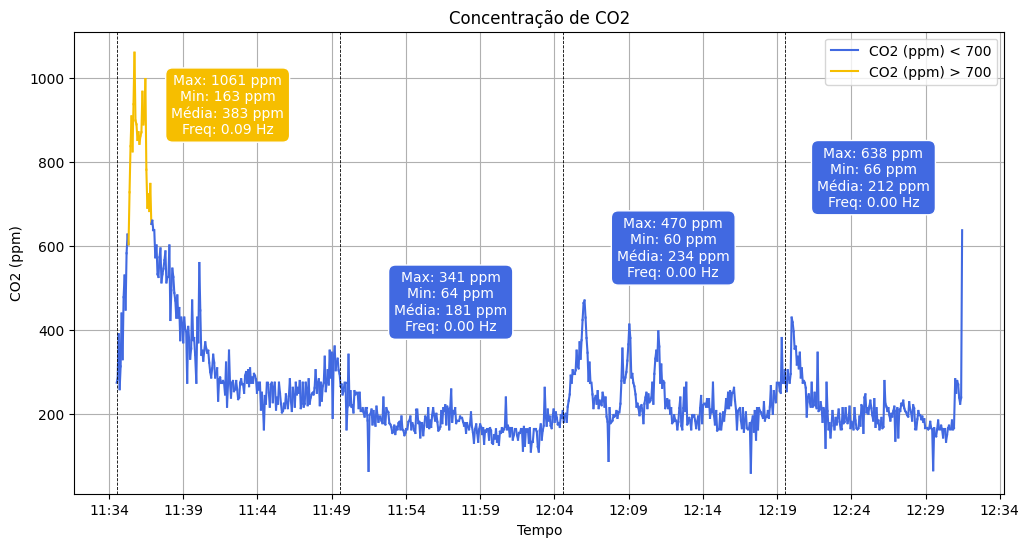

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File path
file_path = 'serial_20250120_113428(RU).txt'

# Read the data without headers and assign column names
data = pd.read_csv(file_path, names=['Tempo', 'Temperatura', 'Umidade', 'CO_ppm', 'CO2_ppm'], header=None)

data['Tempo'] = data['Tempo'].str.strip()
data['Tempo'] = pd.to_datetime(data['Tempo'], format='%H:%M:%S')

# Calculate the 15-minute intervals
data['Interval'] = (data['Tempo'] - data['Tempo'].iloc[0]).dt.total_seconds() // 900  # 900 seconds = 15 minutes

# Prepare the plot
plt.figure(figsize=(12, 6))

# Define the threshold
threshold = 700

# Initialize flags for legend labels
below_label_added = False
above_label_added = False

# Plot with color changes based on the threshold
for i in range(len(data) - 1):
    x = data['Tempo'].iloc[i:i+2]
    y = data['CO2_ppm'].iloc[i:i+2]
    if y.max() > threshold:
        color = '#F6BE00'
        label = 'CO2 (ppm) > 700' if not above_label_added else None
        above_label_added = True
    else:
        color = 'royalblue'
        label = 'CO2 (ppm) < 700' if not below_label_added else None
        below_label_added = True
    plt.plot(x, y, color=color, label=label)

# Add vertical lines and centered statistics for each 15-minute interval
intervals = data.groupby('Interval')
for interval, group in intervals:
    start_time = group['Tempo'].iloc[0]
    end_time = group['Tempo'].iloc[-1]
    max_value = group['CO2_ppm'].max()
    min_value = group['CO2_ppm'].min()
    avg_value = group['CO2_ppm'].mean()
    frequency_above_threshold = 4*(group['CO2_ppm'] > threshold).sum() / (end_time - start_time).total_seconds()

    # Add a vertical line
    plt.axvline(x=start_time, color='black', linestyle='--', linewidth=0.6)

    if max_value > 700:
        b = -200
        fcolor = '#F6BE00'
    else:
        b = 50
        fcolor = 'royalblue'
    
    # Add centered statistics
    mid_time = start_time + (end_time - start_time) / 2
    plt.text(mid_time, max_value + b,
             f'Max: {max_value:.0f} ppm\nMin: {min_value:.0f} ppm\nMédia: {avg_value:.0f} ppm\nFreq: {frequency_above_threshold:.2f} Hz',
             fontsize=10, color='white', ha='center', va='bottom', bbox=dict(boxstyle='round,pad=0.4,rounding_size=0.5', edgecolor='white', facecolor=fcolor))

plt.xlabel('Tempo')
plt.ylabel('CO2 (ppm)')
plt.title('Concentração de CO2')
plt.grid()
plt.legend()

# Format x-axis to show minutes and add ticks every 5 minutes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format to HH:MM
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=5))  # Set ticks every 5 minutes
plt.xticks(rotation=0)  # Rotate for better readability

# Save the plot as a PNG
plt.savefig('RU_co2_rules', dpi=300, bbox_inches='tight')  # Save with high resolution

# Show the plot
plt.show()


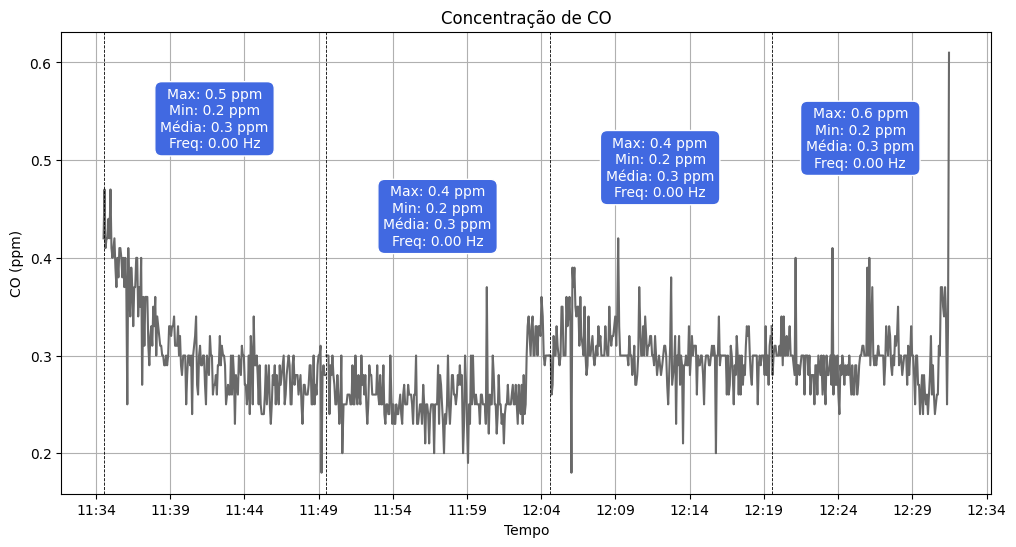

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# File path
file_path = 'serial_20250120_113428(RU).txt'

# Read the data without headers and assign column names
data = pd.read_csv(file_path, names=['Tempo', 'Temperatura', 'Umidade', 'CO_ppm', 'CO2_ppm'], header=None)

data['Tempo'] = data['Tempo'].str.strip()
data['Tempo'] = pd.to_datetime(data['Tempo'], format='%H:%M:%S')

# Calculate the 15-minute intervals
data['Interval'] = (data['Tempo'] - data['Tempo'].iloc[0]).dt.total_seconds() // 900  # 900 seconds = 15 minutes

# Prepare the plot
plt.figure(figsize=(12, 6))

# Define the threshold
threshold = 90

# Plot with color changes based on the average CO concentration
intervals = data.groupby('Interval')
for interval, group in intervals:
    start_time = group['Tempo'].iloc[0]
    end_time = group['Tempo'].iloc[-1]
    max_value = group['CO_ppm'].max()
    min_value = group['CO_ppm'].min()
    avg_value = group['CO_ppm'].mean()
    frequency_above_threshold = 4 * (group['CO_ppm'] > threshold).sum() / (end_time - start_time).total_seconds()

    # Determine color based on average value
    if avg_value > threshold:
        color = 'red'
    else:
        color = 'dimgrey'
    b = 0.04
    if max_value > 0.5:
        b = -0.12

    # Plot the interval
    plt.plot(group['Tempo'], group['CO_ppm'], color=color, label=f'Interval {int(interval)}' if interval == 0 else None)

    # Add vertical line at the start of the interval
    plt.axvline(x=start_time, color='black', linestyle='--', linewidth=0.6)

    # Add centered statistics
    mid_time = start_time + (end_time - start_time) / 2
    plt.text(mid_time, max_value+b,
             f'Max: {max_value:.1f} ppm\nMin: {min_value:.1f} ppm\nMédia: {avg_value:.1f} ppm\nFreq: {frequency_above_threshold:.2f} Hz',
             fontsize=10, color='white', ha='center', va='bottom', 
             bbox=dict(boxstyle='round,pad=0.4,rounding_size=0.5', edgecolor='white', facecolor='royalblue'))

plt.xlabel('Tempo')
plt.ylabel('CO (ppm)')
plt.title('Concentração de CO')
plt.grid()
#plt.legend()

# Format x-axis to show minutes and add ticks every 5 minutes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format to HH:MM
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=5))  # Set ticks every 5 minutes
plt.xticks(rotation=0)  # Rotate for better readability

# Save the plot as a PNG
plt.savefig('RU_co_rules', dpi=300, bbox_inches='tight')  # Save with high resolution

# Show the plot
plt.show()
